<a href="https://colab.research.google.com/github/moonStereoCode/public-BC/blob/main/Fix_1_Scaling_aja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import dataset, mounting drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Download & install library
!pip install pillow
!pip install split-folders tqdm
from PIL import Image
import os, sys, cv2
import tensorflow as tf
import numpy as np
import splitfolders
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D  
from keras.layers import Flatten
from keras.layers import Dense
# from keras.preprocessing.image import image
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Split Data to training and validation 
#input_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/'
#output_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_4'
#splitfolders.ratio(input_folder, output=output_folder, seed=133, ratio=(.8, .2), group_prefix=None) 

In [ ]:
# Fitting the data to the model 
# train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip = "true", vertical_flip = "true")
# test_datagen = ImageDataGenerator(rescale= 1./255)
datagen = ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_4/train',
target_size = (300,200),
color_mode='grayscale',
batch_size = 32,
class_mode = 'binary')

val_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_4/val',
target_size = (300,200),
color_mode='grayscale',
batch_size = 32,
class_mode = 'binary')

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
label = (training_set.class_indices)
print(label)

{'cancer_dataset': 0, 'normal_dataset': 1}


In [ ]:
# Building Model
model = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(300, 200, 1 )),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 3
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid', )
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 300, 200, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 149, 99, 64)       8256      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 47, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 23, 128)     

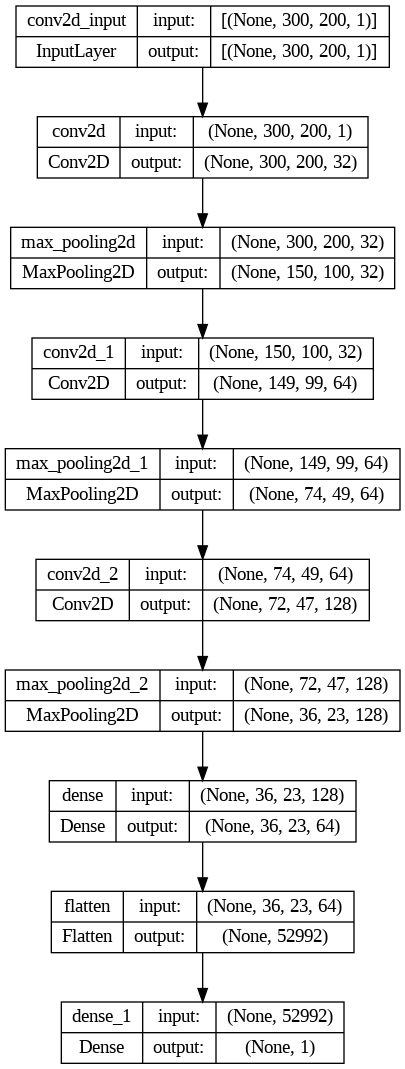

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
def accuracy_graphic():
  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.title('Accuracy Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')

def loss_graphic():
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')

In [ ]:
def new_prediction(img):
  X_size = 200
  Y_size = 300

  img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (X_size, Y_size), Image.ANTIALIAS)
  return new_array.reshape(1, Y_size, X_size, 1)

In [ ]:
import cv2
import tensorflow as tf

#PREDIKSI JOMBLO
def prediction_result(loc, model):
  CATEGORIES = ["Cancer", "Normal"]
  model_load = tf.keras.models.load_model(model)
  prediction = model_load.predict([new_prediction(loc)])
  # print(np.argmax(prediction))
  print(prediction)  # will be a list in a list.
  print(int(prediction[0][0]))
  print(CATEGORIES[int(prediction[0][0])])


#PREDIKSI Gerombolan
def predict_files(path, model):
  cancer = 0
  normal = 0
  
  for filename in os.listdir(path):
    if filename:
      # model_load = tf.keras.models.load_model(model)
      # prediction = model_load.predict([new_prediction(os.path.join(path,filename))])
      prediction = model.predict([new_prediction(os.path.join(path,filename))])

      if (prediction[0][0] == 0):
        cancer+=1
      else :
        normal+=1
      # print(prediction)  # will be a list in a list.
      # print(filename, " = ", prediction[0][0], " - ", (prediction))
      
    else:
      break

  print("cancer = ", cancer)
  print("normal = ", normal)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

## 1

In [ ]:
history = model.fit(training_set, epochs=20, batch_size=16, validation_data = val_set)

Epoch 1/20
30/30 [==============================] - 805s 27s/step - loss: 0.6313 - accuracy: 0.6417 - val_loss: 0.5444 - val_accuracy: 0.6792
Epoch 2/20
30/30 [==============================] - 148s 5s/step - loss: 0.5703 - accuracy: 0.7188 - val_loss: 0.5246 - val_accuracy: 0.7500
Epoch 3/20
30/30 [==============================] - 132s 4s/step - loss: 0.5286 - accuracy: 0.7354 - val_loss: 0.5579 - val_accuracy: 0.7208
Epoch 4/20
30/30 [==============================] - 132s 4s/step - loss: 0.5137 - accuracy: 0.7469 - val_loss: 0.4614 - val_accuracy: 0.7625
Epoch 5/20
30/30 [==============================] - 133s 4s/step - loss: 0.4826 - accuracy: 0.7667 - val_loss: 0.4407 - val_accuracy: 0.7875
Epoch 6/20
30/30 [==============================] - 138s 5s/step - loss: 0.4862 - accuracy: 0.7750 - val_loss: 0.4288 - val_accuracy: 0.8083
Epoch 7/20
30/30 [==============================] - 132s 4s/step - loss: 0.4648 - accuracy: 0.7833 - val_loss: 0.4104 - val_accuracy: 0.7917
Epoch 8/20
3

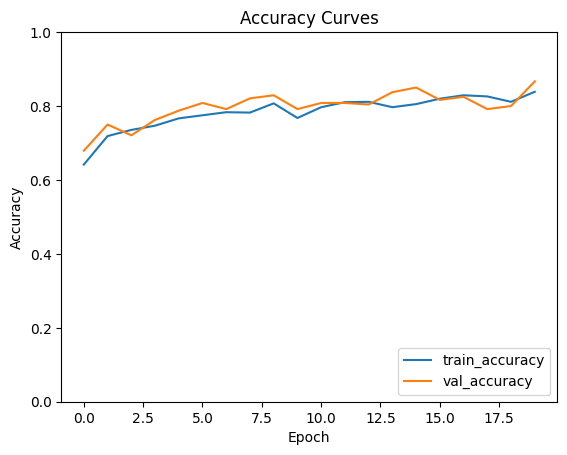

In [ ]:
accuracy_graphic()

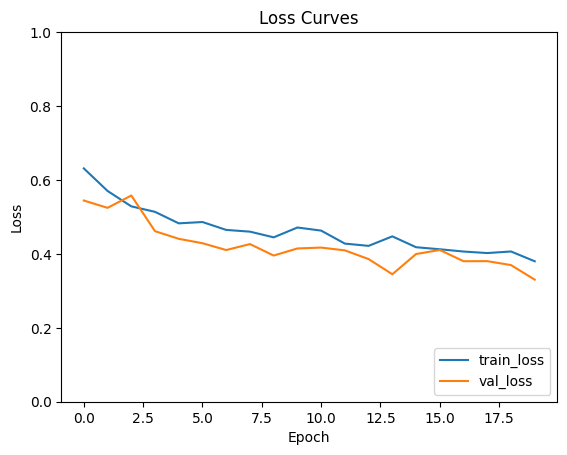

In [ ]:
loss_graphic()

In [ ]:
model.save("/content/gdrive/MyDrive/SKRIPSI/model/rslt_data_opt1.h5")

In [ ]:
model.evaluate(val_set)

8/8 [==============================] - 11s 1s/step - loss: 0.4134 - accuracy: 0.8042


[0.41342979669570923, 0.8041666746139526]

In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/cancer_resized/", model)

1/1 [==============================] - 0s 45ms/step
cancer =  14
normal =  46


In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/normal_resized/", model)

1/1 [==============================] - 0s 46ms/step
cancer =  15
normal =  45


## 2

In [ ]:
history = model.fit(training_set, epochs=10, batch_size=16, validation_data = val_set)

Epoch 1/10
30/30 [==============================] - 136s 4s/step - loss: 0.6957 - accuracy: 0.5562 - val_loss: 0.6469 - val_accuracy: 0.6833
Epoch 2/10
30/30 [==============================] - 129s 4s/step - loss: 0.6028 - accuracy: 0.6896 - val_loss: 0.5306 - val_accuracy: 0.7000
Epoch 3/10
30/30 [==============================] - 141s 5s/step - loss: 0.5568 - accuracy: 0.7240 - val_loss: 0.5495 - val_accuracy: 0.7125
Epoch 4/10
30/30 [==============================] - 131s 4s/step - loss: 0.4933 - accuracy: 0.7656 - val_loss: 0.4848 - val_accuracy: 0.8042
Epoch 5/10
30/30 [==============================] - 139s 5s/step - loss: 0.5193 - accuracy: 0.7594 - val_loss: 0.4717 - val_accuracy: 0.7708
Epoch 6/10
30/30 [==============================] - 131s 4s/step - loss: 0.4838 - accuracy: 0.7656 - val_loss: 0.4469 - val_accuracy: 0.8000
Epoch 7/10
30/30 [==============================] - 129s 4s/step - loss: 0.4483 - accuracy: 0.7854 - val_loss: 0.4380 - val_accuracy: 0.8083
Epoch 8/10
30

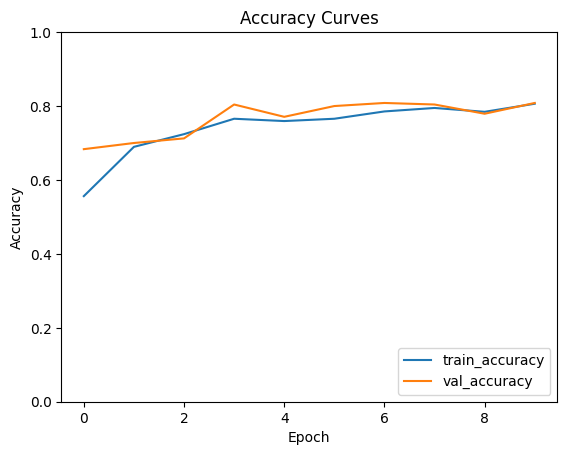

In [ ]:
accuracy_graphic()

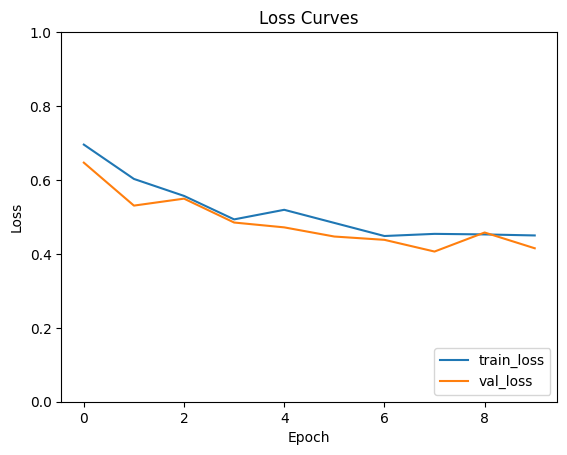

In [ ]:
loss_graphic()

In [ ]:
model.save("/content/gdrive/MyDrive/SKRIPSI/model/rslt_data_opt2.h5")

In [ ]:
model.evaluate(val_set)

8/8 [==============================] - 9s 1s/step - loss: 0.3700 - accuracy: 0.8167


[0.37001463770866394, 0.8166666626930237]

In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/cancer_resized/", model)

1/1 [==============================] - 0s 47ms/step
cancer =  9
normal =  51


In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/normal_resized/", model)

1/1 [==============================] - 0s 94ms/step
cancer =  10
normal =  50


## 3

In [ ]:
history = model.fit(training_set, epochs=10, batch_size=16, validation_data = val_set)

Epoch 1/10
30/30 [==============================] - 134s 4s/step - loss: 0.6691 - accuracy: 0.5781 - val_loss: 0.5829 - val_accuracy: 0.6833
Epoch 2/10
30/30 [==============================] - 146s 5s/step - loss: 0.5748 - accuracy: 0.6979 - val_loss: 0.5273 - val_accuracy: 0.7125
Epoch 3/10
30/30 [==============================] - 140s 5s/step - loss: 0.5428 - accuracy: 0.7042 - val_loss: 0.7223 - val_accuracy: 0.6500
Epoch 4/10
30/30 [==============================] - 131s 4s/step - loss: 0.5149 - accuracy: 0.7479 - val_loss: 0.4871 - val_accuracy: 0.7667
Epoch 5/10
30/30 [==============================] - 139s 5s/step - loss: 0.4904 - accuracy: 0.7646 - val_loss: 0.4314 - val_accuracy: 0.7833
Epoch 6/10
30/30 [==============================] - 141s 5s/step - loss: 0.4949 - accuracy: 0.7542 - val_loss: 0.4308 - val_accuracy: 0.7833
Epoch 7/10
30/30 [==============================] - 128s 4s/step - loss: 0.4598 - accuracy: 0.7792 - val_loss: 0.4381 - val_accuracy: 0.8000
Epoch 8/10
30

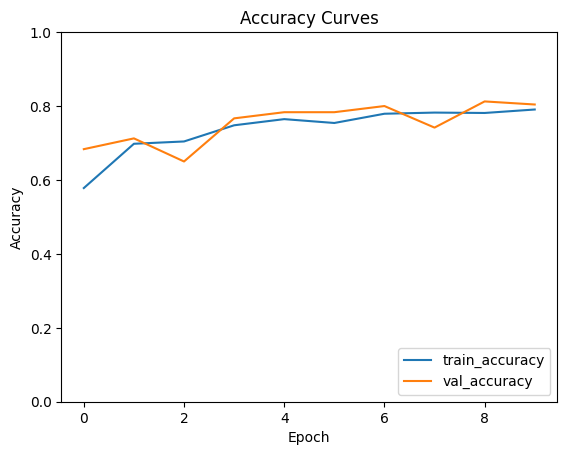

In [ ]:
accuracy_graphic()

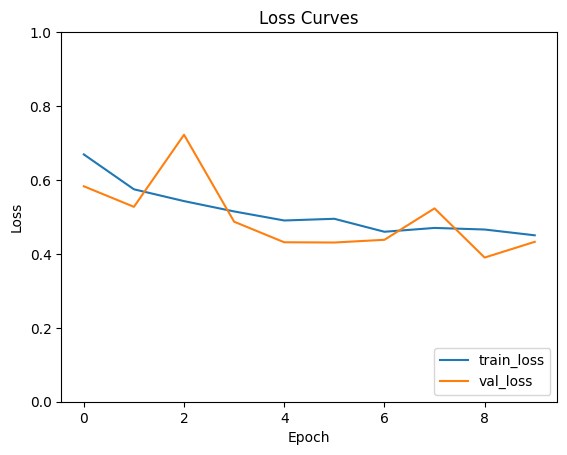

In [ ]:
loss_graphic()

In [ ]:
model.save("/content/gdrive/MyDrive/SKRIPSI/model/rslt_data_opt3.h5")

In [ ]:
model.evaluate(val_set)

8/8 [==============================] - 8s 1s/step - loss: 0.3879 - accuracy: 0.8458


[0.38786718249320984, 0.8458333611488342]

In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/cancer_resized/", model)

1/1 [==============================] - 0s 46ms/step
cancer =  18
normal =  42


In [ ]:
predict_files("/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/normal_resized/", model)

1/1 [==============================] - 0s 82ms/step
cancer =  20
normal =  40


## Resize The Dataset and Datatest

In [ ]:
#fetching image from Googledrive folder & resize it (cancer dataset)
path_cancer ='/content/gdrive/My Drive/SKRIPSI/Dataset/cancer_dataset/'
dirs = os.listdir(path_cancer)

def resize_cancer():
  for filename in os.listdir(path_cancer):
    img = cv2.imread(os.path.join(path_cancer,filename))
    res = cv2.resize(img, dsize=(200,300),interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/cancer_dataset/',"RESIZED_"+filename),res)
   
resize_cancer()

In [ ]:
#fetching image from Googledrive folder & resize it (normal dataset)
path_normal ='/content/gdrive/My Drive/SKRIPSI/Dataset/normal_dataset/'
dirs = os.listdir(path_normal)

def resize_normal():
  for filename in os.listdir(path_normal):
    img = cv2.imread(os.path.join(path_normal,filename))
    res = cv2.resize(img, dsize=(200,300),interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/normal_dataset/', "RESIZED_"+filename),res)

resize_normal()

In [ ]:
#fetching image from Googledrive folder & resize it (cancer datatest)
path_cancer = r'/content/gdrive/My Drive/SKRIPSI/Datatest/raw_image/cancer_datatest/'
path_cancer_target =  '/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/cancer_resized/'

def resize_cancer():
  for filename in os.listdir(path_cancer):
    img = Image.open(os.path.join(path_cancer,filename))
    img = img.resize((200,300), Image.ANTIALIAS)
    img.save(path_cancer_target+"Resized_"+filename)

resize_cancer()

In [ ]:
#fetching image from Googledrive folder & resize it (normal datatest)
path_normal = r'/content/gdrive/My Drive/SKRIPSI/Datatest/raw_image/normal_datatest/'
path_normal_target =  '/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/scaling/normal_resized/'

def resize_normal():
  for filename in os.listdir(path_normal):
    img = Image.open(os.path.join(path_normal,filename))
    img = img.resize((200,300), Image.ANTIALIAS)
    img.save(path_normal_target+"Resized_"+filename)

resize_normal()